In [1]:
#imports
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import random
from tqdm import tqdm
from decimal import Decimal
import networkx as nx
import copy


In [2]:
df = pd.read_excel("./manufacturing_emails_preprocessed.xlsx")

#preprocess data by removing duplicate rows (where node1, node2 and timestamp are the same) NOTE: was not duplicates in the dataset:
nonDuplicateDf = df.drop_duplicates(subset=['node1', 'node2', 'timestamp'])

#nonDuplicateDf = df.drop_duplicates(subset=['node1', 'node2'])
edges = nonDuplicateDf[["node1", "node2", "timestamp"]].to_numpy() #array with all arcs, each row is an arc, with first column being origin node, second column is destination node
numberOfVertices = len(np.unique(edges[:, :2])) #number of vertices = the number of unique value in the two first columns of th eexcel sheet
g = ig.Graph(numberOfVertices, edges[:, :2])  #for edges, use all rows, but only two first columns (ignore timestamp)





Task 14

In [3]:
#make G
GDf = df.copy(deep = True)
GEdges = GDf[["node1", "node2", "timestamp"]].to_numpy() 
GNumberOfVertices = len(np.unique(GEdges[:, :2]))
G = ig.Graph(GNumberOfVertices, GEdges[:, :2])  

#make aggregated G:
GAggregatedDf = GDf.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="aggregatedTimestamps") #merges all node1/node2 that are equal
GAggregatedEdges = GAggregatedDf[["node1", "node2", "aggregatedTimestamps"]].to_numpy() 
GAggregatedNumberOfVertices = len(np.unique(GAggregatedEdges[:, :2]))
G_AGGREGATED = ig.Graph(GAggregatedNumberOfVertices, GAggregatedEdges[:, :2])  

In [4]:
#this code gets a derangement of an array, which is a shuffled version of input array, that guarantees that none of the elements is in the same index as they were in the original array
#NOTE: code from https://stackoverflow.com/questions/25200220/generate-a-random-derangement-of-a-list

def isDerangement(l_original, l_proposal):
    return all([l_original[i] != item for i, item in enumerate(l_proposal)])

def getDerangement(arr):
    l_proposal = copy.copy(arr)

    while not isDerangement(arr, l_proposal):
        random.shuffle(l_proposal)
    return l_proposal


In [5]:
timestamps = df["timestamp"].to_numpy()
randomTimestamps = getDerangement(timestamps)

In [6]:
#make G2
G2Df = df.copy(deep = True)
G2Df["timestamp"] = randomTimestamps #assign the random timesteps to the dataframe again
G2edges = G2Df[["node1", "node2", "timestamp"]].to_numpy() 
G2NumberOfVertices = len(np.unique(G2edges[:, :2]))
G2 = ig.Graph(G2NumberOfVertices, G2edges[:, :2])  




In [7]:
#make aggregated G2:

G2AggregatedDf = G2Df.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="aggregatedTimestamps") #merges all node1/node2 that are equal
G2AggregatedEdges = G2AggregatedDf[["node1", "node2", "aggregatedTimestamps"]].to_numpy() 
G2AggregatedNumberOfVertices = len(np.unique(G2AggregatedEdges[:, :2]))
G2_AGGREGATED = ig.Graph(G2AggregatedNumberOfVertices, G2AggregatedEdges[:, :2])  



In [46]:
# make G3:

#"""#old make G3
T = 57791

newTimeStamps = [ [] for i in range(len(timestamps))] #list of empty lists for all links ()
timestamps = df["timestamp"].to_numpy()
for time in timestamps:
    idx = random.randint(0, len(timestamps)-1) #random index, inclusive on 0 and 166
    newTimeStamps[idx].append(time)
    
G3Df = df.copy(deep = True)
G3Df["timestamp"] = newTimeStamps
G3Edges = G3Df[["node1", "node2", "timestamp"]].to_numpy() 
G3NumberOfVertices = len(np.unique(G3Edges[:, :2])) 
G3 = ig.Graph(G3NumberOfVertices, G3Edges[:, :2])  

#"""

In [47]:
test1Df = df.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="timestamp") #merges all node1/node2 that are equal
test2Df = df.drop_duplicates(subset=["node1", "node2"])
print(len(test1Df), len(test2Df))

3250 3250


In [48]:
#make aggregated G3:


""" #NOTE do not need this because of the assumption made for task 14
#G3 aggregatedDf is now a 2d list for each row, flatten 2d list to 1d
def extendLists(arr):
	return sum(arr, [])
G3AggregatedDf["aggregatedTimestamps"] = G3AggregatedDf["aggregatedTimestamps"].apply(extendLists)

G3AggregatedEdges = G3AggregatedDf[["node1", "node2", "aggregatedTimestamps"]].to_numpy() 
G3AggregatedNumberOfVertices = len(np.unique(G3AggregatedEdges[:, :2]))
G3_AGGREGATED = ig.Graph(G3AggregatedNumberOfVertices, G3AggregatedEdges[:, :2])  
"""

G3AggregatedDf = G3Df.groupby(["node1", "node2"])["timestamp"].apply(list).reset_index(name="timestamp") #merges all node1/node2 that are equal

newTimeStamps = [ [] for i in range(3250)] #list of empty lists for all links ()
timestamps = df["timestamp"].to_numpy()
for time in timestamps:
    idx = random.randint(0, 3250-1) #random index, inclusive on all 3250 links
    newTimeStamps[idx].append(time)
    
G3AggregatedDf["timestamp"] = newTimeStamps
G3AggregatedEdges = G3AggregatedDf[["node1", "node2", "timestamp"]].to_numpy() 
G3AggregatedNumberOfVertices = len(np.unique(G3AggregatedEdges[:, :2])) 
G3_AGGREGATED = ig.Graph(G3AggregatedNumberOfVertices, G3AggregatedEdges[:, :2])  


In [51]:
#Plotting link weigh distribution for G, G2, G3:

GWithLinkWeights = GAggregatedDf.copy(deep = True)
G2WithLinkWeights = G2AggregatedDf.copy(deep = True)
G3WithLinkWeights = G3AggregatedDf.copy(deep = True)

#weight = the total number of contacts between two nodes = length of the aggregatedTimestamps column

for i in tqdm(range(len(G3AggregatedDf))): #=3250, for all unique links between nodes
    GArr = GWithLinkWeights.iloc[i]["aggregatedTimestamps"]
    GWithLinkWeights.at[i,'aggregatedTimestamps'] = len(GArr)

    G2Arr = G2WithLinkWeights.iloc[i]["aggregatedTimestamps"]
    G2WithLinkWeights.at[i,'aggregatedTimestamps'] = len(G2Arr)

    G3Arr = G3WithLinkWeights.iloc[i]["timestamp"]
    G3WithLinkWeights.at[i,'timestamp'] = len(G3Arr)

100%|██████████| 3250/3250 [00:00<00:00, 4796.63it/s]


NOTE: GWithLinkWeights and G2WithLinkWeights are now equal (I think it makes sense considering: "The number of contacts between each node pair is the same between Gdata and G2" and "Consider further the weight of each link in G, which is the total number of contacts between the corresponding two nodes within [0, T].")

In [52]:
GLinkWeights = GWithLinkWeights["aggregatedTimestamps"].to_numpy()
G2LinkWeights = G2WithLinkWeights["aggregatedTimestamps"].to_numpy()
G3LinkWeights = G3WithLinkWeights["timestamp"].to_numpy()

x = np.arange(start=1, stop=len(GLinkWeights)+1, step=1)



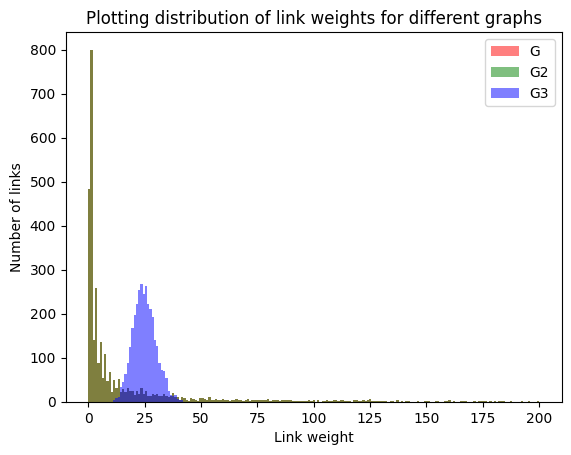

In [53]:
"""
plt.plot(x, GLinkWeights, color="red", label="G", alpha =0.2)
plt.plot(x, G2LinkWeights, color="green", label="G2", alpha =0.2)
plt.plot(x, G3LinkWeights, color="blue", label="G3", alpha =0.2)
"""
bins = np.linspace(0, 200, 200)
plt.hist(GLinkWeights, bins = bins, color="red", label="G", alpha=0.5)
plt.hist(G2LinkWeights, bins = bins, color="green", label="G2", alpha=0.5)
plt.hist(G3LinkWeights, bins = bins, color="blue", label="G3", alpha=0.5)

#TODO x axis on G3 is low now 


plt.title("Plotting distribution of link weights for different graphs")
plt.xlabel("Link weight")
plt.ylabel("Number of links") #NOTE make sure that x and y axis makes sense
# plt.yscale("log")
plt.legend()
plt.show()

I think the plot above makes a lot of sense, G and G2 are equal (because you just shuffled where timestamps were, not how many timestamps each link got), and G3 is just randomly ditributing the timestamps, in which a bell curve makes sense! (could say it does not make quite sense to have max bin 200 when G/G2 has linkweights up to 2900, but since there are so few with that amount of links it does not matter)

In [14]:
#Task 15: slow version, but necessary since timestamps are not sorted anymore

#helper functions

def getNewInfectedNodesAtTimestepWithNumpy(infoSpreadNpArray, fromNode, timestamp, lengthOfArr = 82281):
    """get all nodes a node would infect at a specific timestamp. Returns the new infected nodes, as well as the new index to start looking from"""
    #these two lines get all nodes that the fromNode has an arc to, at timestep timestamp. Have to do it for both node1 col and node2 col since links are undirected
    res = set()
    for i in range(lengthOfArr):
        row = infoSpreadNpArray[i] #first element is node1, second is node2, third is node3
        allTimeStamps = row[2] #is an array of timestamps
        for t in allTimeStamps: #iterate over all timestamps for the link, and if timestamp not equal to timestamp that is currently being checked, then continue
            if (t != timestamp):
                continue

            if (row[0] == fromNode):
                res.add(row[1])
            if (row[1] == fromNode):
                res.add(row[0])

    return res




In [45]:
def simInfoSpreadSlow(df, resultsFilename):

	numInfectedNodesForAllIterations = [] # = I(t) = 2d list that contains the number of infected nodes at each timestep (timestep is index here) for each iteration 

	T = 57791 #= number of nodes = max(nonDuplicateDf["timestamp"].to_numpy())
	N = 167 # = number of simulations to do = number of nodes
	dfNpArr = df.to_numpy()
	for i in (range(1, N+1)):	 #each simulation

		initialInfectedNode = i 
		infectedNodes = {initialInfectedNode} #currently infected nodes (store as set since it only needs unique values)
		numInfectedNodes = [1] #always start with 1 infected node at timestep 0

		for j in tqdm(range(1, T+1)): 
			newInfectedNodes = set() 
			for infectedNode in infectedNodes:
				newNodes = getNewInfectedNodesAtTimestepWithNumpy(dfNpArr, infectedNode, j)
				newInfectedNodes.update(newNodes)
			
			infectedNodes.update(newInfectedNodes) #add list of newly infected nodes to set, if duplicate, it is removed since it is a set

			numInfectedNodes.append(len(infectedNodes))
		numInfectedNodesForAllIterations.append(numInfectedNodes)

	np.savetxt(resultsFilename, numInfectedNodesForAllIterations.T)
    
# yNp = simInfoSpread("test.txt", df)


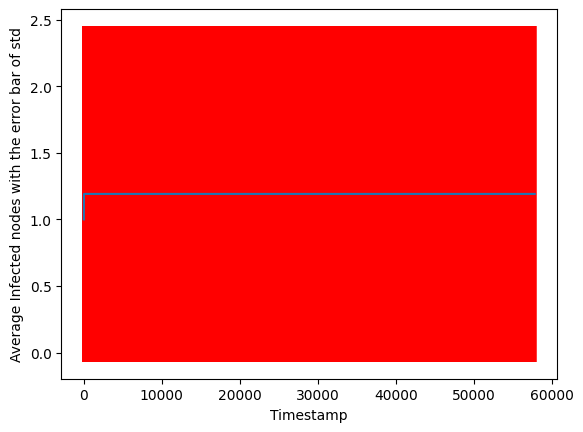

In [49]:
#check results
T = range(57792)
average_infection=yNp.mean(axis=0)
std_infection=yNp.std(axis=0)
plt.figure(1)
plt.errorbar(T,average_infection,yerr=std_infection, ecolor='r')
plt.xlabel('Timestamp')
plt.ylabel('Average Infected nodes with the error bar of std')
plt.savefig('task9.eps', format='eps')

plt.show()


In [41]:
#Task 15 fast version:
#simulateinfospreading fast version

def simInfoSpreadFast(df, resultsFilename):
	num_vertices=167
	dfNpArr = df.to_numpy()
	T = range(57792)
	y = list(np.zeros((57792, num_vertices)))
	for first_infected_node in tqdm(range(1,num_vertices+1)): 
		infected= {first_infected_node}

		currTimestep = 1
		currTimestepInfected = set()
		
		for row in dfNpArr:
			if (row[2] > currTimestep):
				currTimestep = row[2]
				infected.update(currTimestepInfected)
				currTimestepInfected = set()

			if row[0] in infected and row[1] not in infected:
				currTimestepInfected.add(row[1])
			if row[1] in infected and row[0] not in infected:
				currTimestepInfected.add(row[0])
				
			y[row[2]][first_infected_node-1]=len(infected)
			
	np.savetxt(resultsFilename, y)
    


NOTE: må nok bruke min originale metode på dette, fordi nå er jo ikke timestamps sortert (can use fast version on G1/G2 if the timestamps are sorted)

In [16]:
simInfoSpreadFast(GDf, "Task15Results/G_info_spread.txt")

100%|██████████| 167/167 [00:14<00:00, 11.41it/s]


In [17]:
#for G2:
#sort the dataframe in accordance to the timestamp array, and then run normal infospread code:

G2Df = G2Df.sort_values(by=['timestamp'])
simInfoSpreadFast(G2Df, "Task15Results/G2_info_spread.txt")


100%|██████████| 167/167 [00:14<00:00, 11.61it/s]


In [47]:
#for G3:
#NOTE WATCH OUT THAT G3 IS TRANSPOSED (FIXED NOW BUT BE CAREFUL) -> need faster way to do this
#have to do slow version since timestamps are not in order at all
# simInfoSpreadSlow(G3Df, "Task15Results/G3_info_spread.txt")

In [54]:
#NOTE: Doing this is basically making the non-aggregated G3Df

allRows = []
for row in tqdm(G3Df.to_numpy()): 
    a,b = row[0], row[1]
    timesteps = row[2]
    for t in timesteps: #this is 1 -> 57791 inclusive (not 0) #NOTE here, if a link did not receive timesteps, then it is ignored (so have fewer links)
        allRows.append([a,b,t])



G3ExpandedDf = pd.DataFrame(allRows, columns = ['node1','node2','timestamp'])
G3ExpandedNp = np.array(allRows)
G3ExpandedDf = G3ExpandedDf.sort_values(by=['timestamp'])
G3ExpandedDf = G3ExpandedDf[(G3ExpandedDf.T != 0).all()] #drop rows that are 0 (because numpy array was init with all 0)

G3SortedDf = G3ExpandedDf.copy(deep=True)
G3SortedDf = G3SortedDf.astype({"node1":"int","node2":"int", "timestamp":"int"}) #have to convert all values to int (since they are going to be used to access array)

100%|██████████| 82281/82281 [00:00<00:00, 393838.40it/s]


In [56]:
#simulate for G3
simInfoSpreadFast(G3SortedDf, "Task15Results/G3_info_spread.txt")


100%|██████████| 167/167 [00:14<00:00, 11.48it/s]


In [57]:
#Plot:

GRes = np.loadtxt("Task15Results/G_info_spread.txt")
G2Res = np.loadtxt("Task15Results/G2_info_spread.txt")
G3Res = np.loadtxt("Task15Results/G3_info_spread.txt")

GAvg = GRes.mean(axis = 1)
GStd = GRes.std(axis = 1)

G2Avg = G2Res.mean(axis = 1)
G2Std = G2Res.std(axis = 1)

G3Avg = G3Res.mean(axis = 1)
G3Std = G3Res.std(axis = 1)

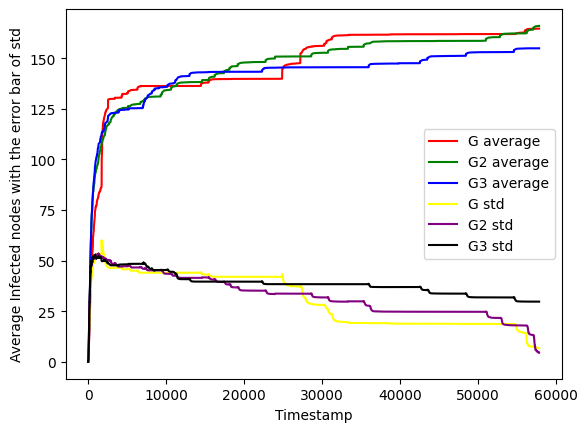

In [58]:

x = [i for i in range(1, 57792+1)] #x axis is each timestep

# plt.figure(1)
# plt.errorbar(T,average_infection,yerr=std_infection, ecolor='r')

plt.plot(x, GAvg, label="G average", color="red")
plt.plot(x, G2Avg, label="G2 average", color="green")
plt.plot(x, G3Avg, label="G3 average", color="blue") 

plt.plot(x, GStd, label="G std", color="yellow")
plt.plot(x, G2Std, label="G2 std", color="purple")
plt.plot(x, G3Std, label="G3 std", color="black") 

plt.xlabel('Timestamp')
plt.ylabel('Average Infected nodes with the error bar of std')
plt.savefig('task15.eps', format='eps')
plt.legend()

plt.show()

C:\Users\eivin\AppData\Local\Temp\ipykernel_10976\1946034713.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, GAvg, 'k', color='#CC4F1B', label="G")
C:\Users\eivin\AppData\Local\Temp\ipykernel_10976\1946034713.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, G2Avg, 'k', color='#1B2ACC', label="G2")
C:\Users\eivin\AppData\Local\Temp\ipykernel_10976\1946034713.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, G3Avg, 'k', color='#3F7F4C', label="G3")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


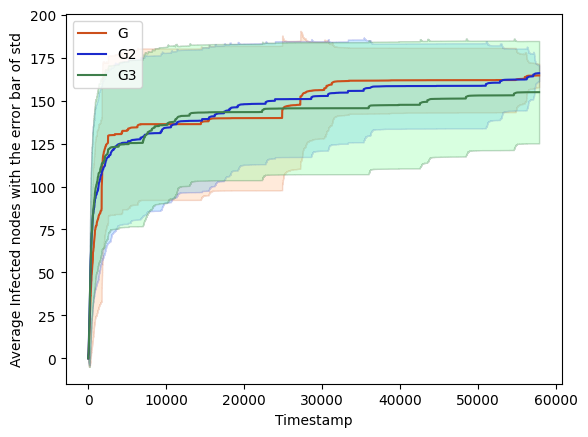

In [78]:
#plot with errorbar:


plt.plot(x, GAvg, 'k', color='#CC4F1B', label="G")
plt.fill_between(x, GAvg-GStd, GAvg+GStd,
    alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.plot(x, G2Avg, 'k', color='#1B2ACC', label="G2")
plt.fill_between(x, G2Avg-G2Std, G2Avg+G2Std,
    alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.plot(x, G3Avg, 'k', color='#3F7F4C', label="G3")
plt.fill_between(x, G3Avg-G3Std, G3Avg+G3Std,
    alpha=0.3, edgecolor='#3F7F4C', facecolor='#7EFF99')


plt.xlabel('Timestamp')
plt.ylabel('Average Infected nodes with the error bar of std')
plt.savefig('task15.eps', format='eps')
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


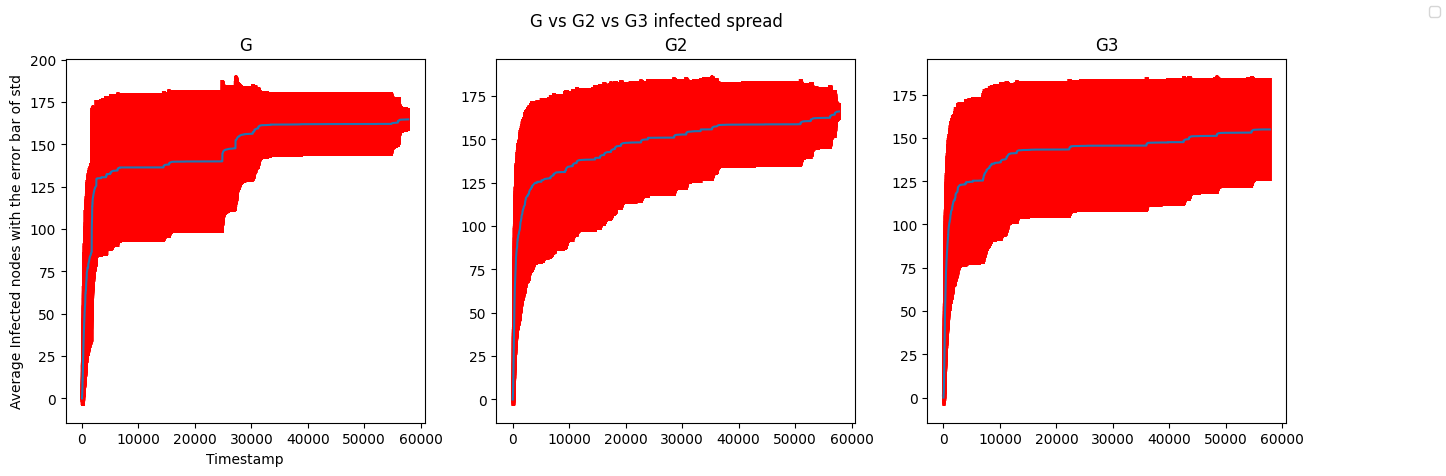

In [113]:
#with plots side by side
cm = 1/2.54
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(40*cm,12*cm))
fig.suptitle('G vs G2 vs G3 infected spread')
fig.legend()

# ax1.plot(x, GAvg, label="G", color="red")
ax1.errorbar(x,GAvg, GStd, ecolor="red")
ax1.set_title("G")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Average Infected nodes with the error bar of std")
ax1.set_label("G")

ax2.errorbar(x,G2Avg, G2Std, ecolor="red")
ax2.set_title("G2")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Average Infected nodes with the error bar of std")
ax1.set_label("G2")

ax3.errorbar(x,G3Avg, G3Std, ecolor="red")
ax3.set_title("G3")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Average Infected nodes with the error bar of std")
ax1.set_label("G3")
